LATIHAN 1

In [13]:
!pip install nltk

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics


In [17]:
df = pd.read_csv("/content/drive/MyDrive/Semester 7 /Machine Learning /LAT1_1217070085_Vilda azizah wiguna/ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [18]:
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion','Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


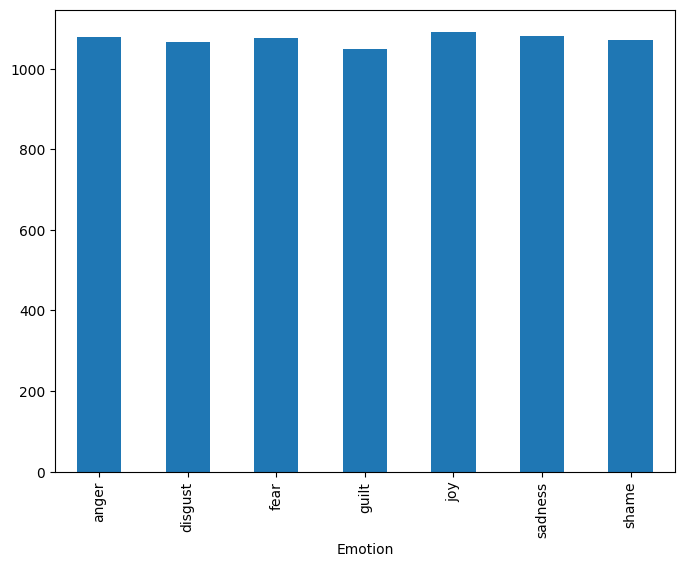

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [20]:
new_df['Text']
new_df['Emotion']

def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0,len(input_df)):
        curText = input_df[1].iloc[i]
        curText = curText.replace('\n','')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)
    #print(tokenizedList)
    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)
    for i in range(0,len(tokenizedList)):
        curList = tokenizedList[i]
        newList = [] #List without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)

    #print(tokenizedListWithoutPunct)
#Stremming
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0,len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    return tokenizedStemmed

In [21]:
def transformSentence(sent):
    s = []
    sent = sent.replace('\n','')
    sentTokenized = word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentlist = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentlist.append(word.lower())
    sWithoutPunct.append(newSentlist)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sWithoutPunct)):
        curList = sWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [22]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [23]:
new_df['Text']=getTokenizedList(df)
#new_df['text']

In [24]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'], new_df['Emotion'], test_size =.3, random_state=1)

In [25]:
#Function to pass the List to the Tfidf vectorizer
def returnPhrase(inputList):
    return inputList

In [26]:
#Extracting features for Naive Bayes6
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()


In [27]:
curAlpha = 0.33 #smoothing factor in NB
NBClassifier = MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain, Y_train)
myPredTest = NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print(curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5835920177383592


In [28]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.51      0.47      0.49       331
     disgust       0.72      0.50      0.59       324
        fear       0.62      0.70      0.66       311
       guilt       0.43      0.62      0.51       299
         joy       0.69      0.69      0.69       323
     sadness       0.68      0.60      0.64       351
       shame       0.52      0.51      0.52       316

    accuracy                           0.58      2255
   macro avg       0.60      0.58      0.58      2255
weighted avg       0.60      0.58      0.59      2255



In [29]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()


In [30]:
curC=2
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain, Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc SVM
0.6124168514412417


In [31]:
print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.53      0.55      0.54       331
     disgust       0.67      0.60      0.63       324
        fear       0.65      0.72      0.69       311
       guilt       0.50      0.56      0.53       299
         joy       0.70      0.71      0.70       323
     sadness       0.67      0.65      0.66       351
       shame       0.56      0.50      0.53       316

    accuracy                           0.61      2255
   macro avg       0.61      0.61      0.61      2255
weighted avg       0.61      0.61      0.61      2255



In [32]:
#to predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
  sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
  return sentPred


In [33]:
#to predict the emotion of a sentence using SVM
def predictSentSVM(sent):
  sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
  return sentPred

In [34]:
sent = "I love you to the moon and back"

#printing the predisted emotion
print("Naive bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))

Naive bayes prediction
['joy']
SVM prediction
['joy']


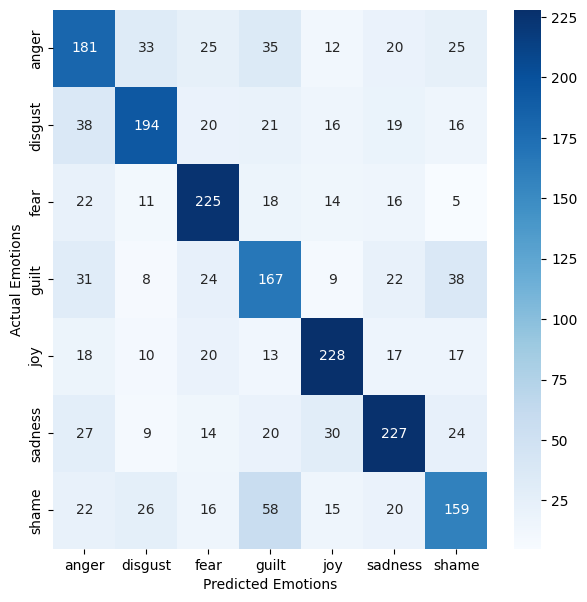

In [35]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['anger','disgust','fear','guilt','joy','sadness','shame',]
cm = confusion_matrix(Y_test, myPredTest, labels=labels)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()

LATIHAN 2 : SIMPLE LINIER REGRESI

In [5]:
#import library dan package yang dibutuhkan
import numpy as np #untuk perhitungan saintifik
import matplotlib.pyplot as plt #untuk plotting
from sklearn.linear_model import LinearRegression#import library LinearRegression dari scikit-learn


In [6]:
#buat data
penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([26000,28000,27000,34000,50000,68000,65000,81000,85000,90000])


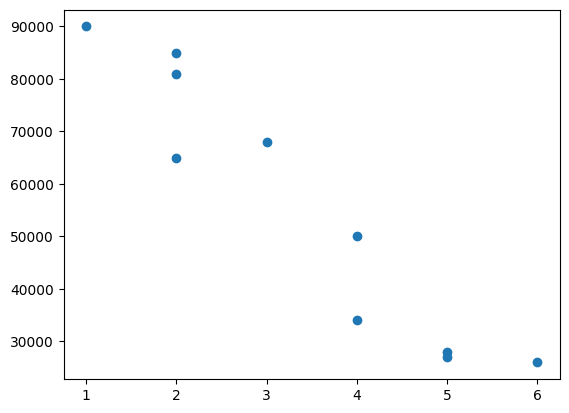

In [7]:
#buat plot
%matplotlib inline
plt.scatter (penjualan,harga)

In [8]:
#buat permodelan regresi
penjualan = penjualan.reshape(-1,1) #kita tukar baris dan kolom ini, agar bisa dikali dalam operasi matriks

linreg = LinearRegression()
linreg.fit(penjualan, harga)


LinearRegression()

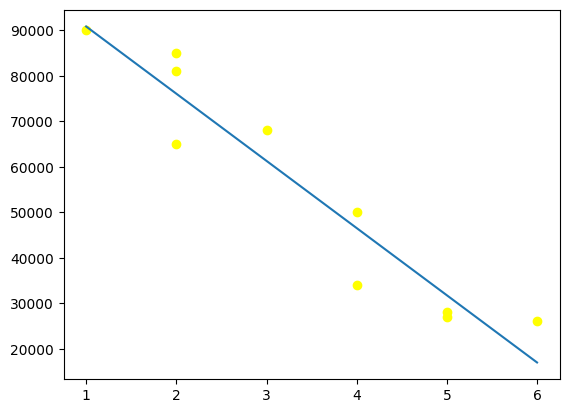

In [10]:
#plot hasil regresi
plt.scatter(penjualan, harga, color='yellow')
plt.plot(penjualan, linreg.predict(penjualan))

LATIHAN LINEAR REGRESI DENGAN DATASET

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv("/content/drive/MyDrive/Semester 7 /Machine Learning /LAT1_1217070085_Vilda azizah wiguna/FuelConsumptionCo2.csv")

# Melihat 5 baris pertama data
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [43]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


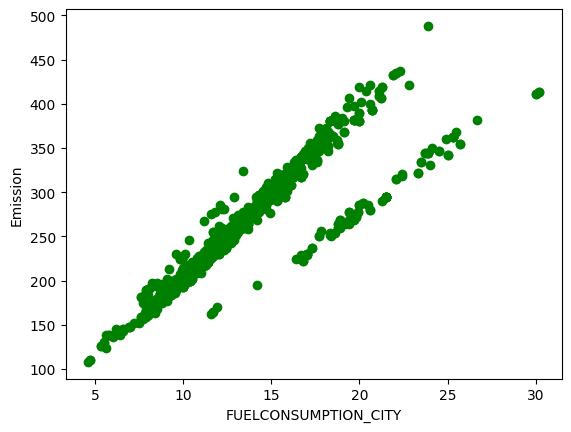

In [44]:
#plot hubungannya
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

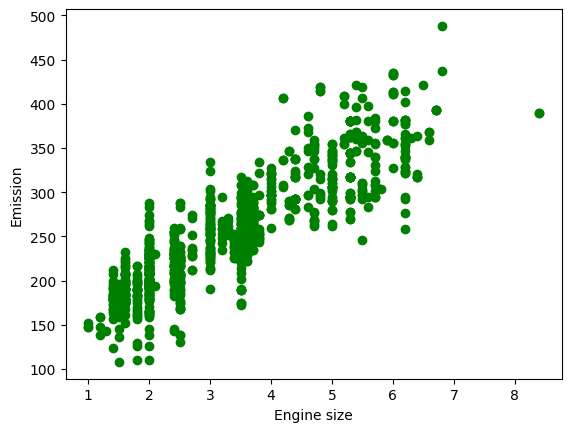

In [47]:
#plot hubungannya
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

MELAKUKAN DATA SPLITTING

In [46]:
#membagi data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

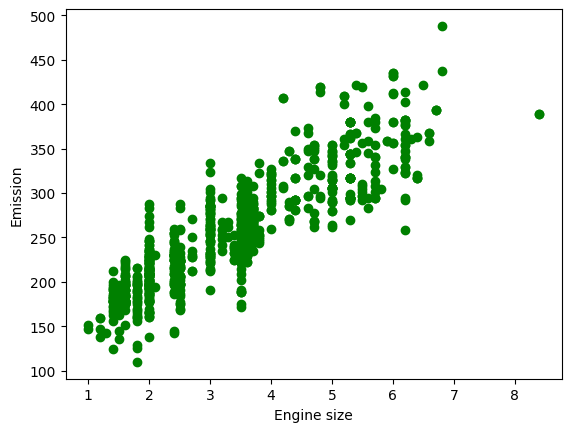

In [48]:
#plot hubungannya
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

MEMBUAT MODEL REGRESI

In [49]:
#membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

#koefisien model
print('coefficients: ', regr.coef_)
print('intercept', regr.intercept_)

coefficients:  [[38.97249476]]
intercept [125.9328076]


Text(0, 0.5, 'Emission')

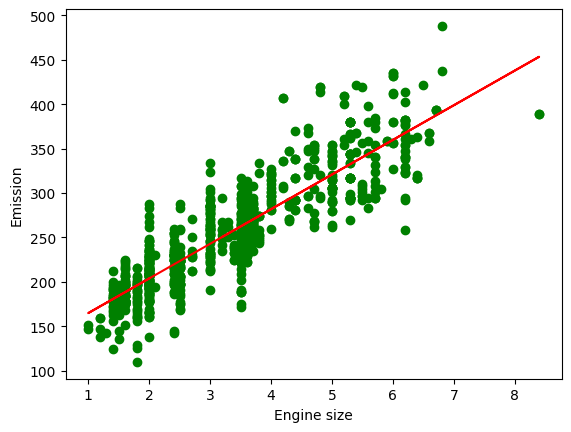

In [50]:
#plot hasil regresi
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [52]:
#menghitung error
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of square (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 25.21
Residual sum of square (MSE): 1117.49
R2-score: 0.62
